In [2]:
import pandas as pd
import numpy as np

In [3]:
# Create a series
pd.Series(np.random.randn(5), index = ['a','b','c','d','e'])

a    1.056309
b    2.979120
c   -0.891768
d    2.142774
e    0.686494
dtype: float64

In [7]:
# Preserve the series in varaible a for later access
s = pd.Series(np.random.randn(5))

In [8]:
print(s)

0    0.415083
1   -0.668358
2    1.214972
3    1.863438
4    0.194227
dtype: float64


In [9]:
# Index
print(s[0])
print("\n")
print(s[:3])

0.415083267396


0    0.415083
1   -0.668358
2    1.214972
dtype: float64


# Dataframes

In [12]:
# Create a dataframe
df = pd.DataFrame(s, columns = ['Column 1'])
df

,Column 1
0,0.415083
1,-0.668358
2,1.214972
3,1.863438
4,0.194227


In [13]:
# Can access columns by name
df['Column 1']

0    0.415083
1   -0.668358
2    1.214972
3    1.863438
4    0.194227
Name: Column 1, dtype: float64

In [15]:
# Easy to add columns
df['Column 2'] = df['Column 1'] * 4
df

,Column 1,Column 2
0,0.415083,1.660333
1,-0.668358,-2.673431
2,1.214972,4.859888
3,1.863438,7.453751
4,0.194227,0.776909


In [16]:
# Other manipulation, like sorting -- if you want to preserve, set equal to var
df.sort_values(by = 'Column 2')

,Column 1,Column 2
1,-0.668358,-2.673431
4,0.194227,0.776909
0,0.415083,1.660333
2,1.214972,4.859888
3,1.863438,7.453751


In [17]:
# Boolean indexing
df[df['Column 2'] <= 2]

,Column 1,Column 2
0,0.415083,1.660333
1,-0.668358,-2.673431
4,0.194227,0.776909


In [21]:
df.apply(lambda x: min(x) + max(x))

Column 1    1.19508
Column 2    4.78032
dtype: float64

In [19]:
df.describe()

,Column 1,Column 2
count,5.000000,5.000000
mean,0.603872,2.415490
std,0.972364,3.889457
min,-0.668358,-2.673431
25%,0.194227,0.776909
50%,0.415083,1.660333
75%,1.214972,4.859888
max,1.863438,7.453751


# Exploring a Dataset

In [12]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [6]:
# Read in data into the dataframe
df = pd.read_csv('data/GlobalTemperatures.csv')

# Show the first 5 rows of the table
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Let's just consider the LandAverageTemperature
# "A primarily lable-location based indexer"
df = df.ix[:,:2]
df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [8]:
df.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


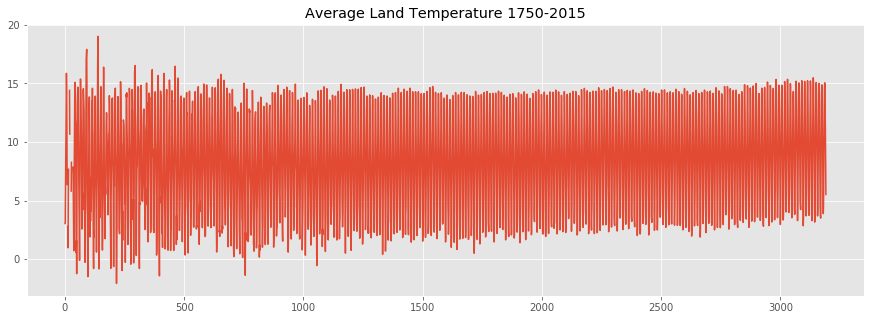

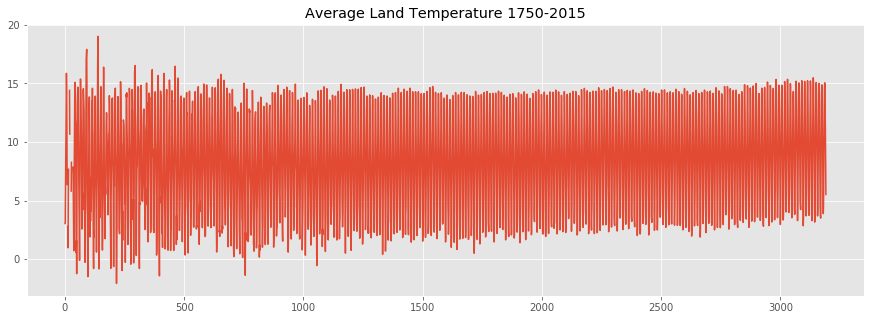

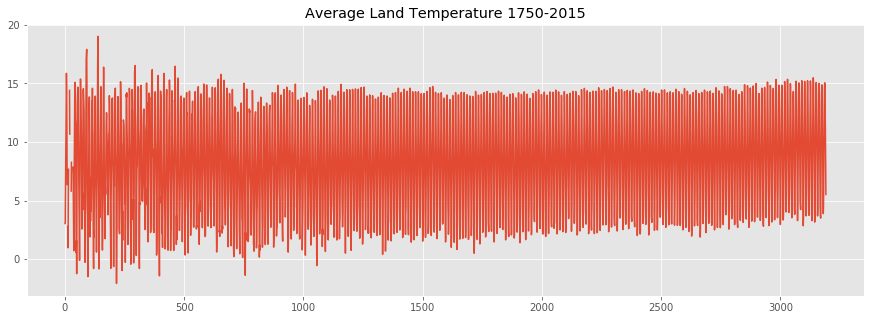

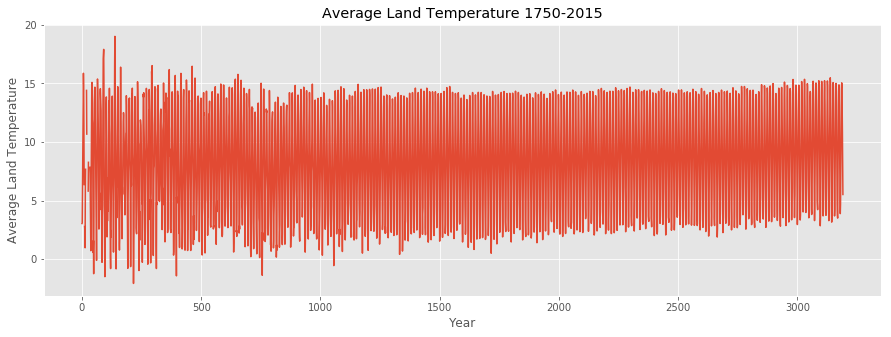

In [14]:
# Cursory plot
plt.figure(figsize = (15, 5))
plt.plot(df['LandAverageTemperature'])
plt.title("Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Average Land Temperature")
plt.show()

In [15]:
# dt column is made up of strings
print(type(df['dt'][0]))

<class 'str'>


In [16]:
# Convert to datatime object
times = pd.DatetimeIndex(df['dt'])

# Group by year
grouped = df.groupby([times.year]).mean()

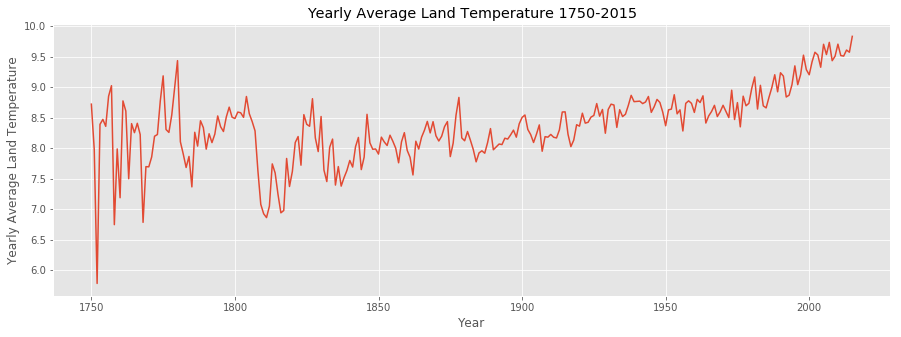

In [17]:
# Plot
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])

# Change features of the graph
plt.title("Yearly Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Yearly Average Land Temperature")
plt.show()